# HELP International

### Importing the required libraries and functions

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Reading and visualising the data

In [2]:
help = pd.read_csv('Country-data.csv', sep=",", encoding="ISO-8859-1", header=0)

In [3]:
help.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
help.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### Checking for null values in the dataset

In [5]:
help.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

As seen from the above null count, we can see that there is no null values in the dataset. That means the dataset is clean.

From the data description sheet, we can see that the three fields 'exports', 'health' and 'imports' are given in percentage of the 'gdpp'. Hence, first let's convert these three fields into actual numbers from percentage values:

In [6]:
help['exports'] = help['gdpp'] * (help['exports']/100)
help['health'] = help['gdpp'] * (help['health']/100)
help['imports'] = help['gdpp'] * (help['imports']/100)

Checking after converting if the conversion was successful

In [7]:
help.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [8]:
help.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


By looking into the statistical representation of all the fields, it seems that some of the fields have outliers. 

In [9]:
help.quantile([0.01, 0.25, 0.50, 0.75, 0.90, 0.99, 1.00])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0.01,2.80,22.243716,17.009362,104.90964,742.24,-2.3488,47.16,1.2432,331.62
0.25,8.25,447.140000,78.535500,640.21500,3355.00,1.8100,65.30,1.7950,1330.00
0.50,19.30,1777.440000,321.886000,2045.58000,9960.00,5.3900,73.10,2.4100,4660.00
0.75,62.10,7278.000000,976.940000,7719.60000,22800.00,10.7500,76.80,3.8800,14050.00
0.90,100.22,17760.600000,3825.416000,15034.28000,41220.00,16.6400,80.40,5.3220,41840.00
0.99,153.40,64794.260000,8410.330400,55371.39000,84374.00,41.4780,82.37,6.5636,79088.00
1.00,208.00,183750.000000,8663.600000,149100.00000,125000.00,104.0000,82.80,7.4900,105000.00


Hence we apply capping to the upper limit of upto 99 percentile since from the above quantile representation that there is a huge rise in the values from 99 percentile to the highest value. As this can effect our analysis, we cap all the values above 99 perentile to 99 percentile value.

In [10]:
features = ['child_mort','exports','health', 'imports','income', 'inflation','life_expec', 'total_fer', 'gdpp']
for i in enumerate(features): 
    Q4 = help[i[1]].quantile(0.99)
    help[i[1]][help[i[1]] >= Q4]=Q4

In [11]:
help.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.903593,6538.214776,1054.206622,5873.135222,16857.550898,7.380970,70.551138,2.942259,12756.826347
std,39.027880,11415.308590,1790.845342,9422.700869,17957.012855,7.793224,8.886987,1.498340,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


#### Using distribution plots to better understand the distribution of each fields:

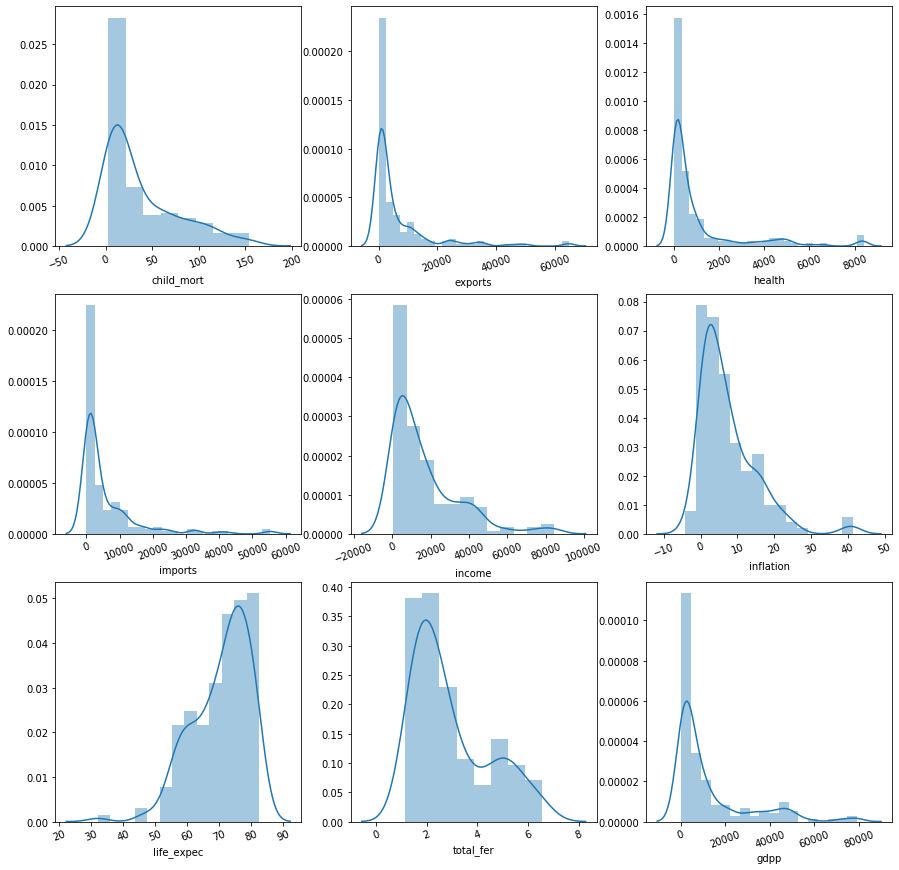

In [12]:
plt.figure(figsize=(15,15))
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features): 
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(help[i[1]])
    plt.xticks(rotation = 20)

By looking into the above curves, we can see that the data in some of the fields are not normally distributed as they are not exactly following the bell curve structure. Also, it can be inferred from the curves that there might be three different segments that can be created for some of the fields.

#### Using box plots to check if there is any oiutliers in the data

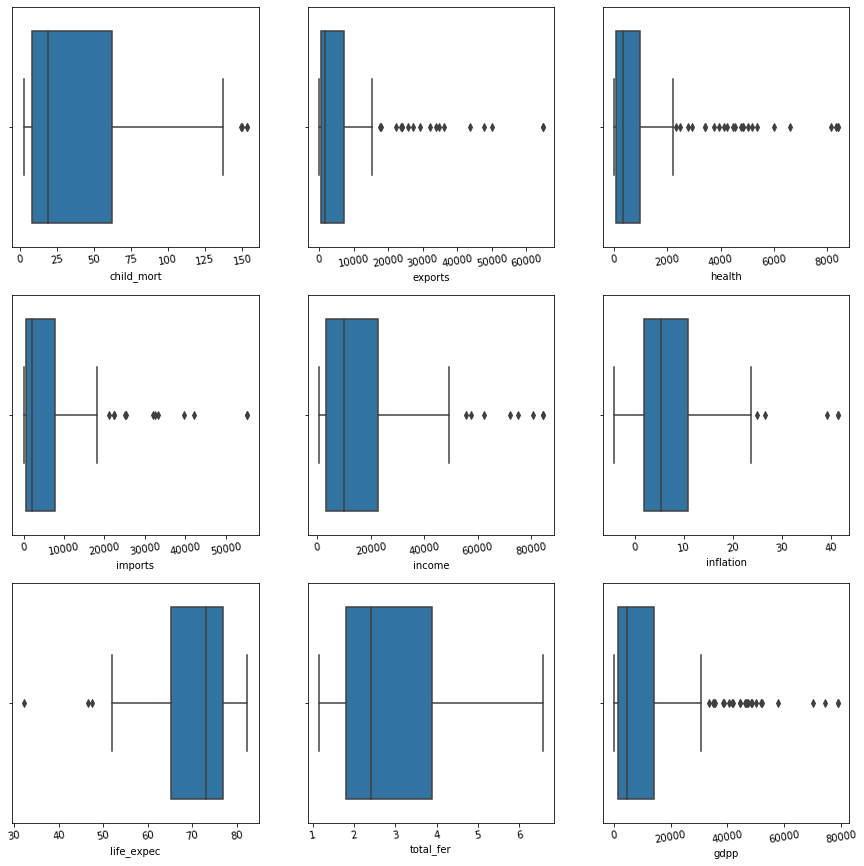

In [13]:
plt.figure(figsize=(15,15))
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features): 
    ax = plt.subplot(3,3, i[0]+1)
    sns.boxplot(help[i[1]])
    plt.xticks(rotation = 10)

It seems that some of the fields still contain outliers. However, these may not actually be outliers since these countries may be financially strong and hence, the metric contain higher values than other countries.

Looking into the quantile representation to find out if these are actually outliers or not

In [14]:
help.quantile([0.01, 0.25, 0.50, 0.75, 0.90, 0.99, 1.00])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0.01,2.800,22.243716,17.009362,104.90964,742.24,-2.34880,47.1600,1.243200,331.62
0.25,8.250,447.140000,78.535500,640.21500,3355.00,1.81000,65.3000,1.795000,1330.00
0.50,19.300,1777.440000,321.886000,2045.58000,9960.00,5.39000,73.1000,2.410000,4660.00
0.75,62.100,7278.000000,976.940000,7719.60000,22800.00,10.75000,76.8000,3.880000,14050.00
0.90,100.220,17760.600000,3825.416000,15034.28000,41220.00,16.64000,80.4000,5.322000,41840.00
0.99,151.156,55136.308400,8352.982736,46629.10260,81883.16,39.97452,82.2578,6.554624,76125.92
1.00,153.400,64794.260000,8410.330400,55371.39000,84374.00,41.47800,82.3700,6.563600,79088.00


From the above information, it is clear that the financial values don't have outliers since all the fields seem to have continuous data and the higher values represent more developed countries. Hence, no more outlier treatment is required.

## Scalling the variables

#### Creating a new DataFrame removing the country column for scalling

In [15]:
df = help[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


### Performing Hopkin's score test to check if the given dataset can be clustered

In [16]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [17]:
#Let's check the Hopkins measure
hopkins(df)

0.8760832295392426

The Hopkin's score is very high as above and this means the given data set is very good to be clustered.

In [18]:
# instantiate
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(df)
df_scaled.shape

(167, 9)

In [19]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344006,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.926396,-0.702259
1,-0.547497,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.865054,-0.498726
2,-0.272510,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.034983,-0.477434
3,2.084159,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.153997,-0.530950
4,-0.709406,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.543736,-0.032042


# K-mean Clustering

### Finding the Optimal Number of Clusters using SSD

Text(0.5, 1.0, 'Elbow Curve')

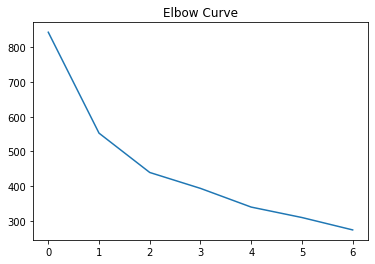

In [20]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)
plt.title("Elbow Curve")

By looking into the above elbow curve, we can choose the number of clusters, K to be 3 or 4. However, the bend at K = 4 is better than that of K = 3. Hence, from Elbow Curve, we choose K=4.

Let's look into the Silhouette scores to select the number of clusters and validate the value of K selected from elbow curve.

In [21]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.46897949959348195
For n_clusters=3, the silhouette score is 0.4051014147893432
For n_clusters=4, the silhouette score is 0.392474625441894
For n_clusters=5, the silhouette score is 0.3846866795249167
For n_clusters=6, the silhouette score is 0.27943611022084847
For n_clusters=7, the silhouette score is 0.303724027591085
For n_clusters=8, the silhouette score is 0.2798301276219179


Text(0.5, 1.0, "Silhauette's Curve")

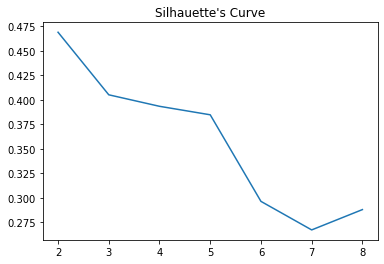

In [22]:
ss = []
for k in range(2,9):
    kmeans = KMeans(n_clusters = k).fit(df_scaled)
    ss.append([k, silhouette_score(df_scaled, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);
plt.title("Silhauette's Curve")

As we can see that the silhouette score for K=4 is not a bad score, we finally choose K = 4 i.e. the number of clusters to be 4.

## Biulding the model with 4 number of clusters (K = 4)

In [23]:
# final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=100)
kmeans.fit(df_scaled)
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 3, 2, 0, 0, 2, 0, 3, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 3, 3,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 3, 3, 0, 0, 2, 3, 0, 3, 2, 2, 0, 0, 2,
       0, 2, 3, 2, 2, 2, 0, 1, 3, 3, 2, 3, 2, 2, 0, 0, 3, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 3, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 3, 0, 0, 1, 3, 0, 2, 2, 2, 2, 2, 3, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 3, 3, 0, 0, 3, 3, 2, 2, 0, 2, 3, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0])

In [24]:
df['cluster'] = kmeans.labels_

Checking the number of countries in different clusters:

In [25]:
df.cluster.value_counts()

2    81
0    48
3    29
1     9
Name: cluster, dtype: int64

Since, we are having very less number of countries in one of the clusters, we decide to reduce the number of clusters from 4 to 3.

Repeating the entire process for K = 3

## Building the model with 3 number of clusters (K = 3)

In [26]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=100)
kmeans.fit(df_scaled)
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

#### Assigning the cluster ids to the actual data frame

In [27]:
help_km = help
help_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [28]:
help_km['cluster_id'] = kmeans.labels_

In [29]:
help_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


#### Plotting box plots to visualise the three clusters with the most important features to understand the inter-cluster differences

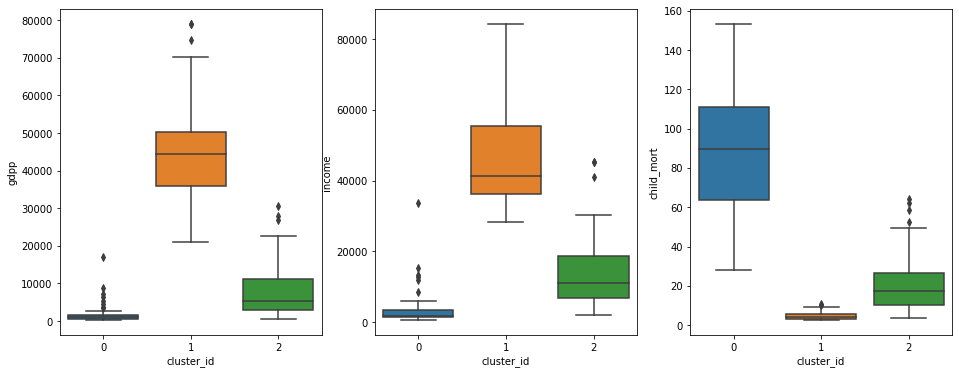

In [30]:
plt.figure(figsize=[16,6])
plt.subplot(131)
sns.boxplot(x='cluster_id', y='gdpp', data=help_km)
plt.subplot(132)
sns.boxplot(x='cluster_id', y='income', data=help_km)
plt.subplot(133)
sns.boxplot(x='cluster_id', y='child_mort', data=help_km)
plt.show()

From the above three plots, we can easily distinguish the three clusters. 
- Cluster 0 contains those countries whose gdpp and income are the lowest but the child mortality rate is highest. 
- Cluster 1 contains those countries whose gdpp and income are highest but the child mortality rate is lowest.
- Cluster 2 contains those countries whose gdpp and income are moderate and the child mortality rate is also moderate.

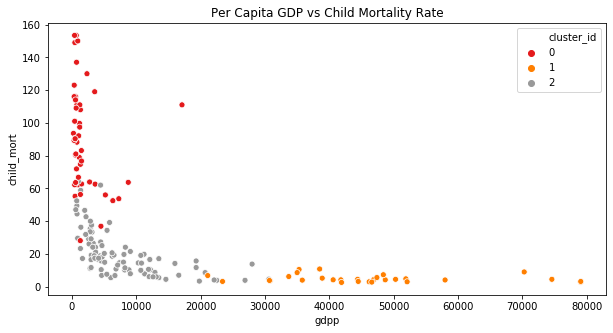

In [31]:
# Plot the Cluster with respect to the clusters obtained
plt.figure(figsize=[10,5])
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_id', legend = 'full', data = help_km, palette='Set1')
plt.title("Per Capita GDP vs Child Mortality Rate")
plt.show()

From the above scatter plot between 'gdpp' and 'child_mort', we can conclude that the cluster 0 contains countries with lower gdpp but higher child mortality rate.
Cluster 2 contains countries with moderate gdpp and moderate child mortality rate. 
Cluster 1 contains countries with higher gdpp but lower child mortality rate.

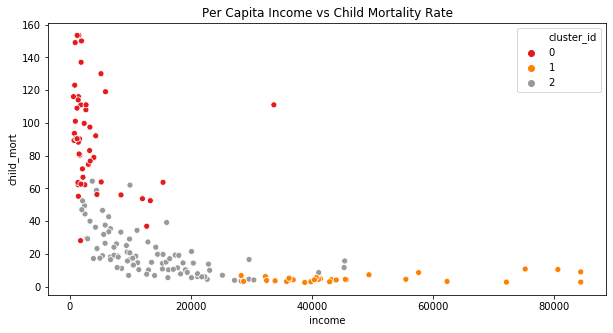

In [32]:
# Plot the Cluster with respect to the clusters obtained
plt.figure(figsize=[10,5])
sns.scatterplot(y = 'child_mort', x = 'income', hue ='cluster_id', legend = 'full', data = help_km, palette='Set1')
plt.title("Per Capita Income vs Child Mortality Rate")
plt.show()

From the above scatter plot between 'income' and 'child_mort', we can conclude that the cluster 0 contains countries with lower income but higher child mortality rate.
Cluster 2 contains countries with moderate income and moderate child mortality rate. 
Cluster 1 contains countries with higher income but lower child mortality rate.

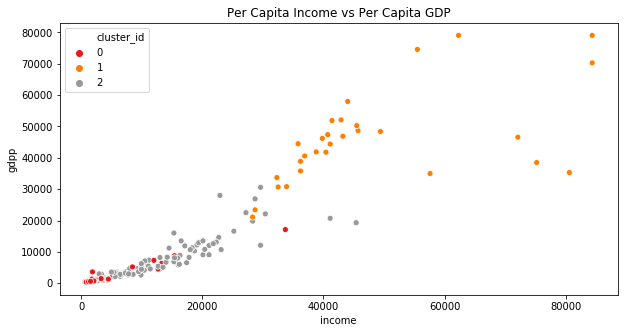

In [33]:
# Plot the Cluster with respect to the clusters obtained
plt.figure(figsize=[10,5])
sns.scatterplot(y = 'gdpp', x = 'income', hue ='cluster_id', legend = 'full', data = help_km, palette='Set1')
plt.title("Per Capita Income vs Per Capita GDP")
plt.show()

From the above scatter plot between 'income' and 'gdpp', we can conclude that the cluster 0 contains countries with lower income and hence lower gdpp. Cluster 1 contains countries with moderate income and moderate gdpp. Cluster 2 contains countries with higher income and higher gdpp.

# Cluster Profiling

#### Creating a temporary Data Frame to profile the clusters

In [34]:
df1 = help_km[['income', 'child_mort', 'gdpp', 'cluster_id']]
df1.head()

,income,child_mort,gdpp,cluster_id
0,1610.0,90.2,553.0,0
1,9930.0,16.6,4090.0,2
2,12900.0,27.3,4460.0,2
3,5900.0,119.0,3530.0,0
4,19100.0,10.3,12200.0,2


#### Plotting the bar plot for the three clusters to showcase the profiles based on the three top priority socio-economic features

In [35]:
df1.cluster_id.value_counts()

2    90
0    48
1    29
Name: cluster_id, dtype: int64

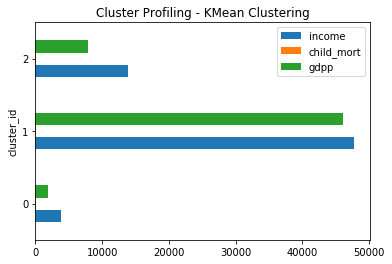

In [36]:
df1.groupby('cluster_id').mean().plot.barh()
plt.title("Cluster Profiling - KMean Clustering")
plt.show()

##### From the above plot, it is very evident that the cluster with cluster id as 0 is the cluster where the countries are the worst based on the three important socio-economic features. These countries' per capita income and per capita GDP is very poor and also the child mortality rate is very high. These are the countries which should be provided with aids.

# Finding the observations that belong to certain cluster

### List of countries that are coming in the cluster which should be provided some aid

In [37]:
#Using the concept of binning
help_km[help_km['cluster_id']==0]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

#### Sorting the countries based on the top three socio-economic features to find the socio-economically poorest countries so that they can be provided with aid. 

In [38]:
help_km[help_km['cluster_id']==0].sort_values(by=['gdpp','income','child_mort'], ascending=[True,True,False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,0
132,Sierra Leone,153.4,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.6000,413.0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.5600,419.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.3100,459.0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.6100,482.0,0


##### From the above sorted list, we see that the countries are sorted based on the lowest income, lowest gdp and highest mortality rate. Some of the poorest countries that are recommended for providing financial aid are as follows:-
- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone
- Madagascar	
- Mozambique	
- Central African Republic
- Malawi
- Eritrea

# Hierarchical Clustering

In [39]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344006,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.926396,-0.702259
1,-0.547497,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.865054,-0.498726
2,-0.272510,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.034983,-0.477434
3,2.084159,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.153997,-0.530950
4,-0.709406,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.543736,-0.032042


#### Creating dendrogram for single linkage method

In [40]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344006,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.926396,-0.702259
1,-0.547497,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.865054,-0.498726
2,-0.272510,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.034983,-0.477434
3,2.084159,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.153997,-0.530950
4,-0.709406,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.543736,-0.032042


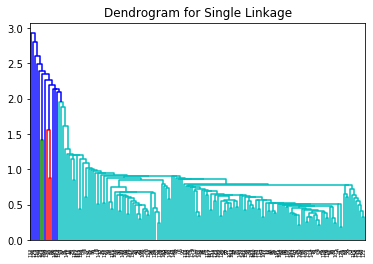

In [41]:
# single linkage
merging = linkage(df_scaled, method="single", metric='euclidean')
dendrogram(merging)
plt.title("Dendrogram for Single Linkage")
plt.show()

From the above plot, it is very much impossible to understand or get any idea of how many cluster should be choosen. Hence, we are trying the complete linkage hierarchical method.

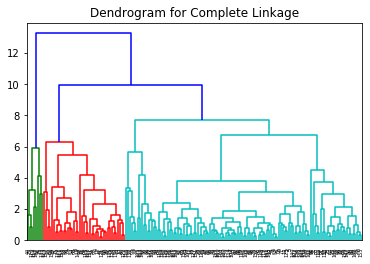

In [42]:
# complete linkage
merging = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(merging)
plt.title("Dendrogram for Complete Linkage")
plt.show()

From this diagram, we can see that the possible number of clusters can be taken as 3. Hence, moving forward with cluster number = 3.

In [43]:
# 3 clusters
cluster_labels = cut_tree(merging, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

Creating another temporary dataframe to analyse the results of hierarchical clustering

In [44]:
help_hr = help
help_hr.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


Assigning the cluster id to the temporary dataframe

In [45]:
help_hr['cluster_id'] = cluster_labels
help_hr.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [46]:
help_hr.cluster_id.value_counts()

0    118
1     41
2      8
Name: cluster_id, dtype: int64

#### Plotting box plots to visualise the three clusters with the most important features to understand the inter-cluster differences

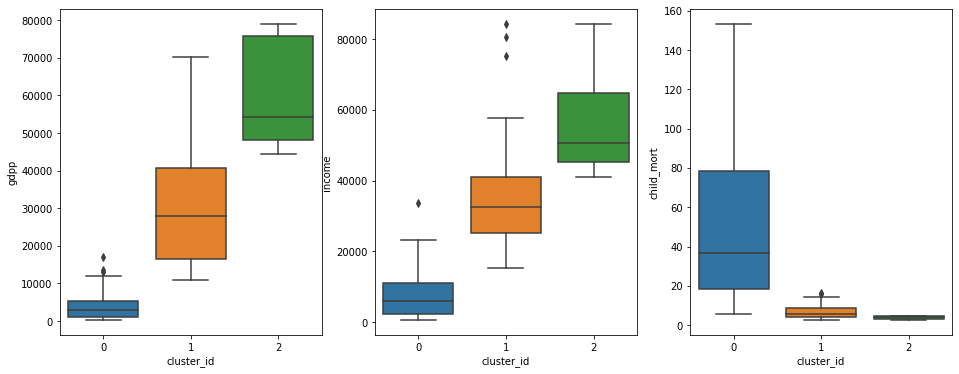

In [47]:
plt.figure(figsize=[16,6])
plt.subplot(131)
sns.boxplot(x='cluster_id', y='gdpp', data=help_hr)
plt.subplot(132)
sns.boxplot(x='cluster_id', y='income', data=help_hr)
plt.subplot(133)
sns.boxplot(x='cluster_id', y='child_mort', data=help_hr)
plt.show()

From the above three plots, we can easily distinguish the three clusters. 
- Cluster 0 contains those countries whose gdpp, income are low and the child mortality rate is comperatively higher. 
- Cluster 1 contains those countries whose gdpp and income are moderate but the child mortality rate is moderate to cluster 2.
- Cluster 2 contains those countries whose gdpp and income are very high but the child mortality rate is very minimal.

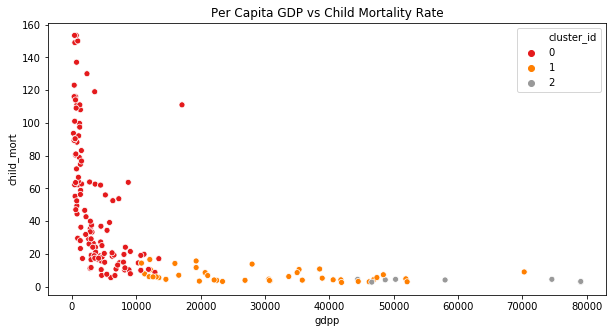

In [48]:
# Plot the Cluster with respect to the clusters obtained
plt.figure(figsize=[10,5])
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_id', legend = 'full', data = help_hr, palette='Set1')
plt.title("Per Capita GDP vs Child Mortality Rate")
plt.show()

From the above scatter plot between 'gdpp' and 'child_mort', we can conclude that the cluster 2 contains countries with higher gdpp but lower child mortality rate. Cluster 1 contains countries with moderate gdpp and moderate child mortality rate. Cluster 0 contains countries with lower gdpp but higher child mortality rate.

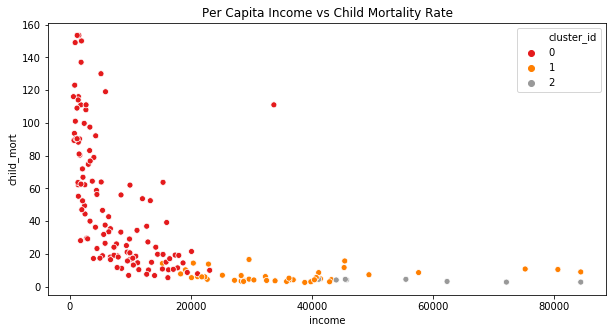

In [49]:
# Plot the Cluster with respect to the clusters obtained
plt.figure(figsize=[10,5])
sns.scatterplot(y = 'child_mort', x = 'income', hue ='cluster_id', legend = 'full', data = help_hr, palette='Set1')
plt.title("Per Capita Income vs Child Mortality Rate")
plt.show()

From the above scatter plot between 'income' and 'child_mort', we can conclude that the cluster 2 contains countries with higher income but lower child mortality rate. Cluster 1 contains countries with moderate income and moderate child mortality rate. Cluster 0 contains countries with lower income but higher child mortality rate.

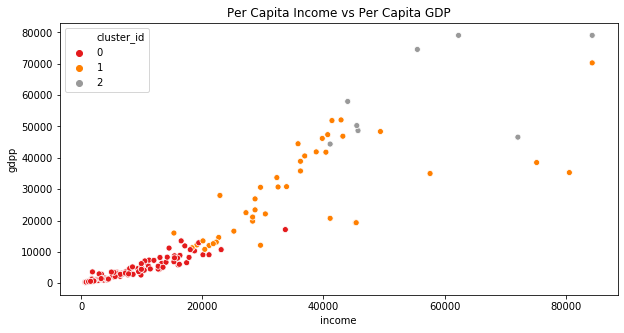

In [50]:
# Plot the Cluster with respect to the clusters obtained
plt.figure(figsize=[10,5])
sns.scatterplot(y = 'gdpp', x = 'income', hue ='cluster_id', legend = 'full', data = help_hr, palette='Set1')
plt.title("Per Capita Income vs Per Capita GDP")
plt.show()

From the above scatter plot between 'income' and 'gdpp', we can conclude that the cluster 0 contains countries with lower income and hence lower gdpp. Cluster 1 contains countries with moderate income and moderate gdpp. Cluster 2 contains countries with higher income and higher gdpp.

# Cluster Profiling

#### Plotting the bar plot for the three clusters to showcase the profiles based on the three top priority socio-economic features

In [51]:
df2 = help_hr[['child_mort','income','gdpp','cluster_id']]
df2.head()

,child_mort,income,gdpp,cluster_id
0,90.2,1610.0,553.0,0
1,16.6,9930.0,4090.0,0
2,27.3,12900.0,4460.0,0
3,119.0,5900.0,3530.0,0
4,10.3,19100.0,12200.0,1


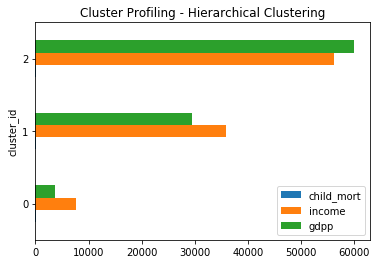

In [52]:
df2.groupby('cluster_id').mean().plot.barh()
plt.title("Cluster Profiling - Hierarchical Clustering")
plt.show()

##### From the above plot, it is very evident that the cluster with cluster id as 0 is the cluster where the countries are the worst based on the three important socio-economic features. These countries' per capita income and per capita GDP is very poor and also the child mortality rate is very high. These are the countries which should be provided with aids.

# Finding the observations that belong to certain cluster

### List of countries that are coming in the cluster which should be provided some aid

In [53]:
help_hr[help_hr['cluster_id']==0]['country']

0      Afghanistan
1          Albania
2          Algeria
3           Angola
5        Argentina
          ...     
162        Vanuatu
163      Venezuela
164        Vietnam
165          Yemen
166         Zambia
Name: country, Length: 118, dtype: object

#### Sorting the countries based on the top three socio-economic features to find the socio-economically poorest countries so that they can be provided with aid.

In [54]:
help_hr[help_hr['cluster_id']==0].sort_values(by=['gdpp','income','child_mort'], ascending=[True,True,False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,0
132,Sierra Leone,153.4,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.6000,413.0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.5600,419.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.3100,459.0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.6100,482.0,0


##### From the above sorted list, we see that the countries are sorted based on the lowest income, lowest gdp and highest mortality rate. Some of the poorest countries that are recommended for providing financial aid are as follows:-

- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone
- Madagascar	
- Mozambique	
- Central African Republic
- Malawi
- Eritrea

### CONCLUSION

##### Though from both K-mean and Hierarchical Clustering technique, we get almost same results, we choose K-Mean technique over Hierarchical Clustering technique. The reason behind choosing one method over the other is in K-Mean method, the countries in Cluster 1 is uniform and not spreaded over the plot. But in Hierarchical method, the distribution of countries in Cluster 0 is very much distributed. This means the cluster contains countries with lower gdp, income and higher child mortality rate and also it contains countries with higher income, gdp and lower mortality rate. So the intra-cluster characteristics are not same for the countries. Hence K-Mean Method of Clustering is choosen for the given DataFrame to find the countires that need the help or aid the most.